## Importación de librerías

In [1]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Carga de datos

In [2]:
df = pd.read_csv('df_regresion.csv', index_col=0)
df.head()

,Education,EducationField,Age,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,NumCompaniesWorked,Country,BusinessTravel,Department,...,RelationshipSatisfaction,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
0,0.316300,0.197519,0.023810,0.000000,0.000000,0.025,0.111111,0.460458,1.000000,1.0,...,0.674294,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.150962,0.000000,0.285714,0.000000,0.000000,0.100,0.777778,0.783678,0.583033,1.0,...,0.674294,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.150962,0.443305,0.095238,0.000000,0.000000,0.100,0.000000,0.445411,1.000000,0.0,...,0.619129,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.150962,0.000000,0.571429,0.076923,0.294118,0.550,0.111111,0.764851,1.000000,0.0,...,0.619129,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.497477,0.443305,0.428571,0.000000,0.411765,0.425,0.333333,0.268675,1.000000,1.0,...,0.438345,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'MonthlyIncome'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [ ]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (1176, 27)
Tamaño del conjunto de prueba: (294, 27)


## Entrenamiento del modelo

In [12]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [13]:
# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [14]:
# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

## Validación del modelo

### Comparación con scatterplot

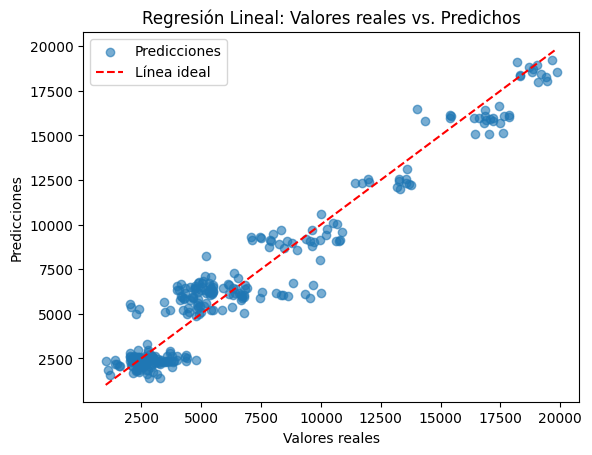

In [15]:
# Graficar valores reales vs. predichos
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

# Agregar línea de referencia (y = x)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo entre reales y predichos
max_val = max(y_test.max(), y_pred.max())  # Valor máximo entre reales y predichos
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

### Comparación de distribuciones

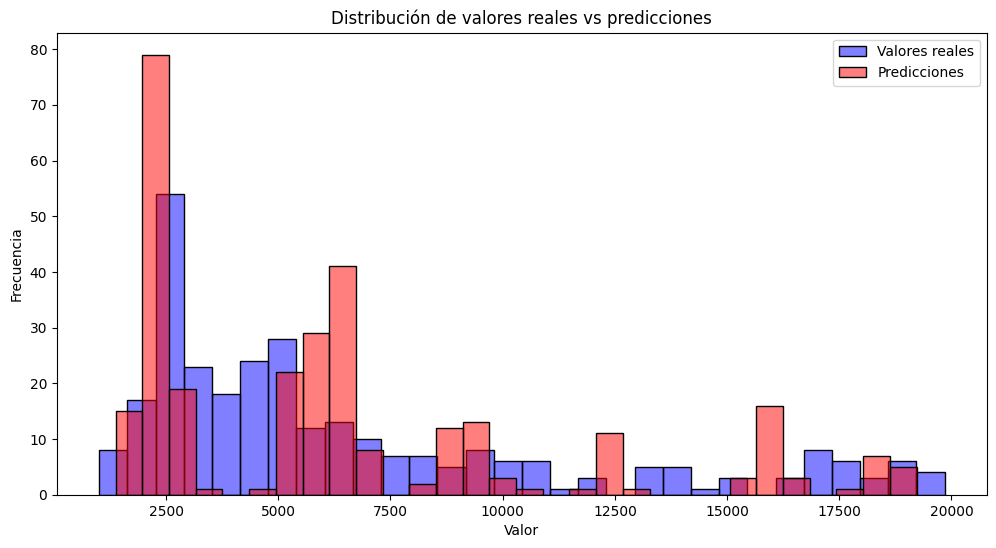

In [21]:
# Graficar valores reales vs. predichos
plt.figure(figsize=(12, 6))

n_bins = 30

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones')
plt.legend()
plt.show()

### Residuos

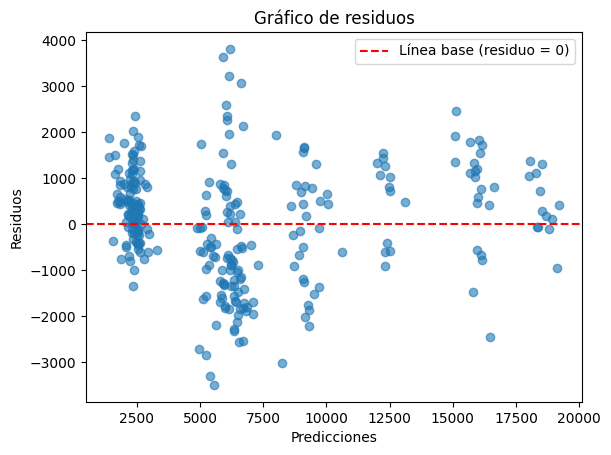

In [22]:
# Calcular los residuos
residuos = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", label="Línea base (residuo = 0)")

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.legend()
plt.show()

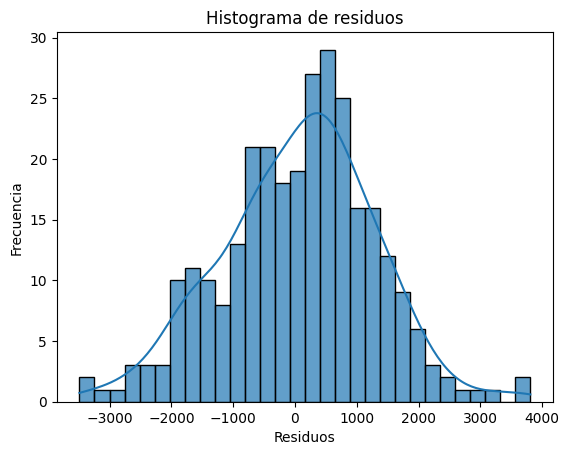

In [23]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

---

## Importancia de características

In [26]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs)  # Ordenar por magnitud

In [27]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
10,JobLevel,10234.918500
11,JobRole,5341.482799
5,TotalWorkingYears,2389.929127
4,YearsWithCurrManager,-417.699099
2,Age,-321.201720
9,Department,-316.563619
3,YearsSinceLastPromotion,270.295218
12,PercentSalaryHike,-154.028949
7,Country,118.995931
13,TrainingTimesLastYear,-97.244506


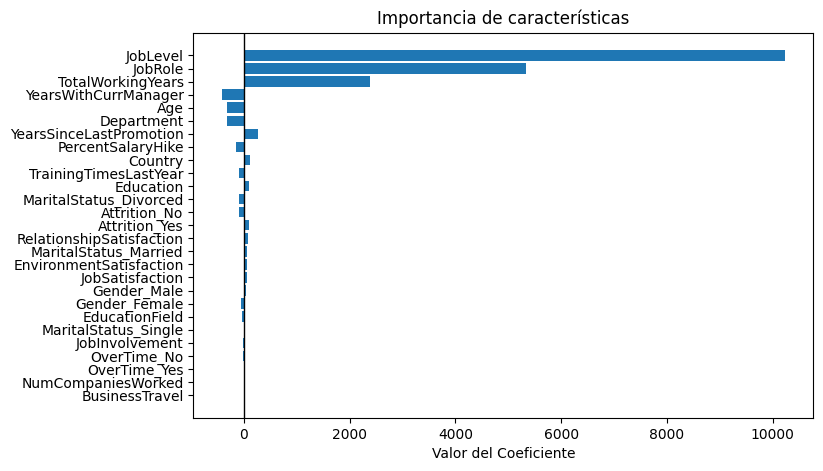

In [28]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Valor del Coeficiente")
plt.title("Importancia de características")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.show()

## Métricas

In [29]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [30]:
# Cálculo de métricas
metrics = {
    "train": {
        "R2": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    },
    "test": {
        "R2": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [33]:
df_metrics.round(2)

,R2,MAE,RMSE
train,0.94,924.79,1170.07
test,0.94,973.36,1224.29


## Entrenamiento final

In [37]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LinearRegression()
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_regresion.pkl")

['modelo_regresion.pkl']

---

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definir modelos con regularización
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas
    metrics_results[name] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T


In [40]:
df_metrics.round(2)

,Train R²,Train MAE,Train RMSE,Test R²,Test MAE,Test RMSE
Linear,0.94,924.79,1170.07,0.94,973.36,1224.29
Ridge,0.94,927.70,1170.97,0.94,972.40,1223.01
Lasso,0.94,924.84,1170.08,0.94,973.34,1224.11
ElasticNet,0.88,1264.58,1601.70,0.89,1291.86,1655.38
